In [1]:
!pip install -U -q scipy

You should consider upgrading via the '/Users/gerard/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [331]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('./5_100_50_all-r.mat')

In [332]:

experimentProposals = mat['experimentBestProposals'][0]
experimentFits = mat['experimentBestFits'][0]
experimentProfiles = mat['experimentBestShapes'][0]
freq_cut = mat['cutFreq'][0][0]
max_generations = mat['maxGen'][0][0]
experimentsFits = mat['experimentBestFits']
experimentsBests = mat['experimentBestProposals']
experimentsBestShapes = mat['experimentBestShapes']
experimentsProposals = mat['experimentCandidates']
experimentsAllFitness = mat['experimentFitness']
total_proposals = len(experimentsBestShapes[0][0][0])
total_experiments = len(mat['experimentBestShapes'][0])
print("Cut freq: "+str(freq_cut))
print("Max gen: "+str(max_generations))
print("Proposals/gen: "+str(total_proposals))
print("Total experiments: "+str(total_experiments))


dataset = []

for iExperiment in range(len(experimentProposals)):
    nValue = []
    fit = []
    profileABH = []
    runout = experimentProposals[iExperiment][0]
    for iGen in range(len(runout)):
        experiment = runout[iGen][0]
        nValue.append(experiment[1][0][0])
        fit.append(experimentFits[iExperiment][0][iGen][0][0])
        profileABH.append(experimentProfiles[iExperiment][0][iGen][0])
    experiments = {
        'nValues': nValue,
        'fit': fit,
        'profileABH':profileABH
    }
    dataset.append(experiments)


Cut freq: 500
Max gen: 50
Proposals/gen: 51
Total experiments: 5


1.8792574354488163
0.05882701262031965


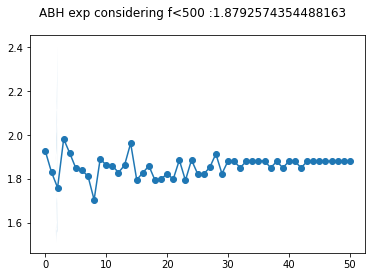

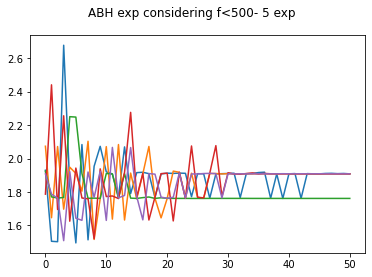

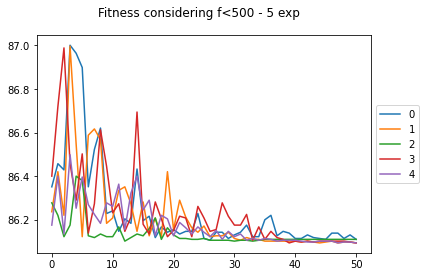

In [333]:
expNMean = []
for exp in dataset:
    expNMean.append(exp['nValues'][50])
print(np.mean(expNMean, axis=0))
print(np.std(expNMean, axis=0))

expNValues = []
for iRadius in range(len(dataset[0]['nValues'])):
    generation = []
    for experiment in dataset:
        generation.append(experiment['nValues'][iRadius])
    expNValues.append(generation)
    
nMean = []
nStdUp = []
nStdDown = []

for exp in expNValues:
    nMean.append(np.mean(exp, axis=0))
    nStdUp.append(np.mean(exp, axis=0)+np.std(exp, axis=0))
    nStdDown.append(np.mean(exp, axis=0)-np.std(exp, axis=0))

fig, (ax) = plt.subplots(1,1)
fig.suptitle('ABH exp considering f<'+str(freq_cut)+ ' :'+str(np.mean(expNMean)))
ax.fill_between(nMean,nStdUp,nStdDown , alpha=0.2)
ax.plot(nMean,'o-')

fig, (ax) = plt.subplots(1,1)
fig.suptitle('ABH exp considering f<'+str(freq_cut)+ '- '+str(total_experiments)+' exp')
for data in dataset:
    ax.plot(data['nValues'],'-')

fig, (ax) = plt.subplots(1,1)
fig.suptitle('Fitness considering f<'+str(freq_cut)+ ' - '+str(total_experiments)+' exp')
current = 0
for data in dataset:
    ax.plot(data['fit'],'-')
plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))


In [334]:
datasetId = 9
genId = 20
profileInPercent = dataset[datasetId]['profileABH'][genId]
expN = dataset[datasetId]['nValues'][genId]

fig, (ax1) = plt.subplots(1,1)
fig.suptitle('ABH exp='+str(expN))
ax1.plot(profileInPercent,'o-')

ax1.set(xlabel='Ring position', ylabel='Radius (R) in %')
ax1.grid()
fig.show()


IndexError: list index out of range